<a href="https://colab.research.google.com/github/kiran26102003/RECOMMENDER-SYSTEM/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
movie_path = 'movies.csv'
rating_path = 'ratings.csv'

In [3]:
movies_df = pd.read_csv(movie_path)
rating_df = pd.read_csv(rating_path)

In [4]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [7]:
movies_df = movies_df.explode('genres')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [8]:
gen_df = movies_df.groupby('genres')
new_gen = gen_df['title'].count().sort_values(ascending = False)
new_gen

,title
genres,
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978


In [9]:
new_gen = new_gen[0:-3]

In [10]:
print("Index - different genre : ")
print(new_gen.index)      #from the group by genres, index would be the genre name
print("Value - genre count : ")
print(new_gen.values)      #from the group by genres, values would be the genre count in all movies

Index - different genre : 
Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western'],
      dtype='object', name='genres')
Value - genre count : 
[4361 3756 1894 1828 1596 1263 1199  980  978  779  664  611  573  440
  382  334  167]


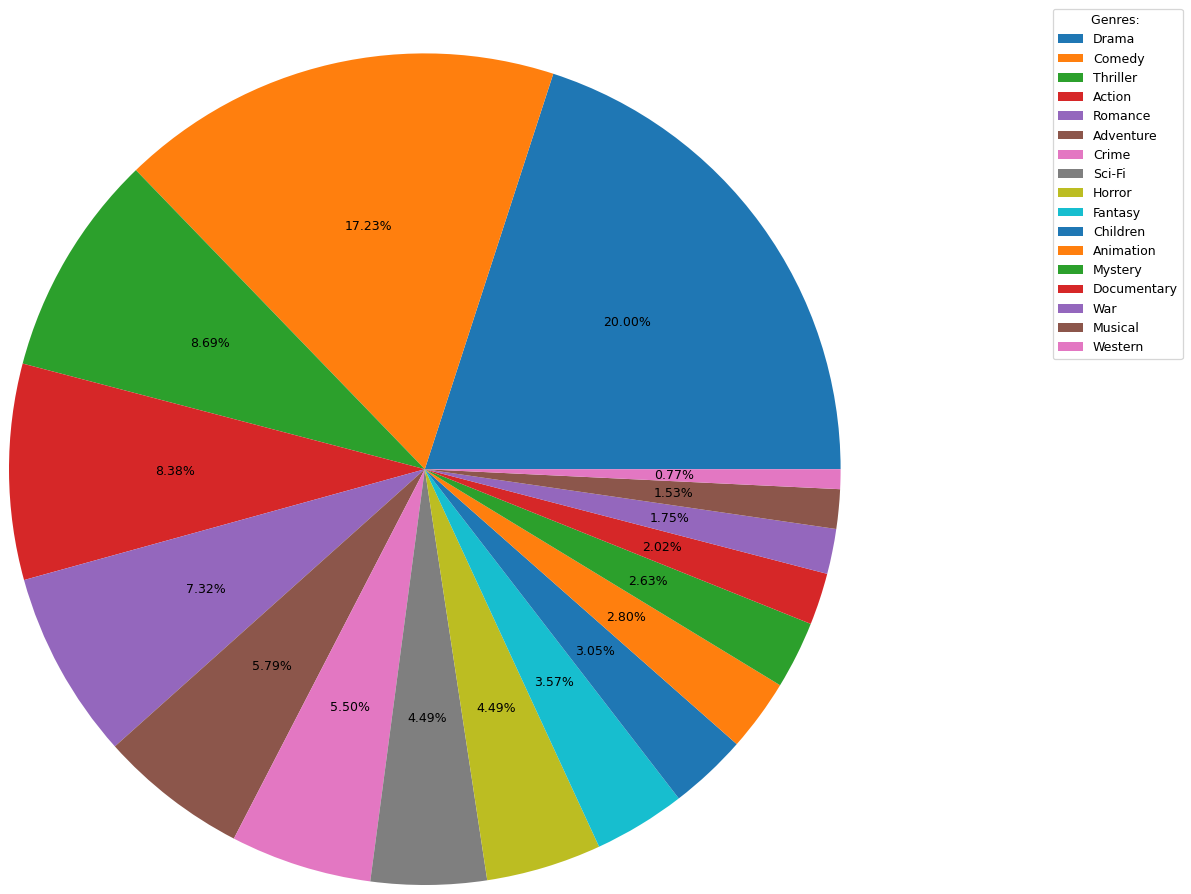

In [11]:
#pie graph
import matplotlib.pyplot as plt

y = new_gen.values
mylabels = new_gen.index

plt.figure(figsize=(7, 5), dpi=90)

#with labels
#plt.pie(y, labels = mylabels,autopct='%1.2f%%',radius = 3)
#plt.legend(title = "Genres: ",loc = "right")

#without labels
plt.pie(y,autopct='%1.2f%%' ,radius = 3)
plt.legend(title = "Genres: ", labels = mylabels, loc = "lower center", bbox_to_anchor=(2.5, 0.8), ncol= 1)

plt.show()

In [12]:

rating_df=pd.read_csv(rating_path,usecols=['userId', 'movieId', 'rating'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [13]:
movies_df.drop(columns = ["genres"], inplace = True)

In [14]:
convert_type = {"movieId" : "int32", "title" : str}

movies_df.drop_duplicates(inplace = True)
movies_df = movies_df.astype(convert_type,copy = False)

In [15]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int32 
 1   title    9742 non-null   object
dtypes: int32(1), object(1)
memory usage: 190.3+ KB


In [16]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
dtypes: float32(1), int32(2)
memory usage: 1.2 MB


In [17]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [18]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [19]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head(20)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"
5,1,70,3.0,From Dusk Till Dawn (1996)
6,1,101,5.0,Bottle Rocket (1996)
7,1,110,4.0,Braveheart (1995)
8,1,151,5.0,Rob Roy (1995)
9,1,157,5.0,Canadian Bacon (1995)


In [20]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
combine_movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [21]:
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [22]:
xpoints = movie_ratingCount['title']
ypoints = movie_ratingCount['totalRatingCount']

print("movie title list: ")
print(xpoints)
print()
print("total rating count list: ")
print(ypoints)

movie title list: 
0                                      '71 (2014)
1         'Hellboy': The Seeds of Creation (2004)
2                          'Round Midnight (1986)
3                             'Salem's Lot (2004)
4                       'Til There Was You (1997)
                          ...                    
9714                              eXistenZ (1999)
9715                                   xXx (2002)
9716               xXx: State of the Union (2005)
9717                        ¡Three Amigos! (1986)
9718    À nous la liberté (Freedom for Us) (1931)
Name: title, Length: 9719, dtype: object

total rating count list: 
0        1
1        1
2        2
3        1
4        2
        ..
9714    22
9715    24
9716     5
9717    26
9718     1
Name: totalRatingCount, Length: 9719, dtype: int64


In [23]:
ratingCount_wise_movieCount = movie_ratingCount.groupby('totalRatingCount')
ratingCount_wise_movieCount = ratingCount_wise_movieCount['title'].count()
ratingCount_wise_movieCount

,title
totalRatingCount,
1,3441
2,1298
3,800
4,529
5,383
...,...
278,1
279,1
307,1


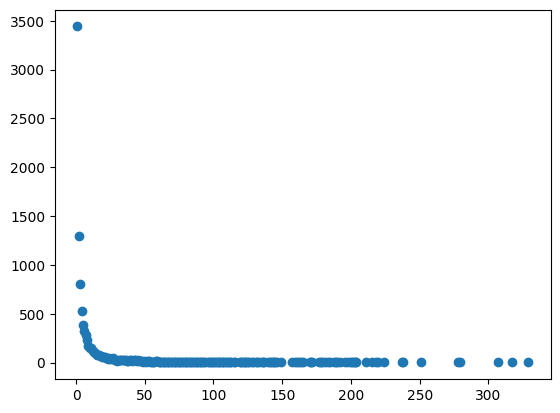

In [24]:
plt.scatter(ratingCount_wise_movieCount.index, ratingCount_wise_movieCount.values)
plt.show()

In [25]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,1,3,4.0,Grumpier Old Men (1995),52
2,1,6,4.0,Heat (1995),102
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),203
4,1,50,5.0,"Usual Suspects, The (1995)",204


In [26]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [27]:
rating_with_totalRatingCount.shape


(100836, 5)

In [28]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,1,3,4.000,Grumpier Old Men (1995),52
2,1,6,4.000,Heat (1995),102
3,1,47,5.000,Seven (a.k.a. Se7en) (1995),203
4,1,50,5.000,"Usual Suspects, The (1995)",204


In [29]:
rating_popular_movie.shape

(41362, 5)

In [30]:
rating_popular_movie.isnull()
rating_popular_movie.isnull().sum().sum()

np.int64(0)

In [31]:
null_columns=rating_popular_movie.columns[rating_popular_movie.isnull().any()]
rating_popular_movie[null_columns].isnull().sum()

,0


In [32]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


**KNN**

In [33]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [34]:
movie_features_df.shape

(450, 606)

In [35]:
movie_features_df.shape[0]

450

In [37]:
desired_movie = input("Movie watching right now: ")
only_movies = movie_features_df.index.tolist()
if desired_movie in only_movies:
  query_index = only_movies.index(desired_movie)
  #print(query_index)
else:
  print("movie not found")

Movie watching right now: Zoolander (2001)


In [38]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [39]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Zoolander (2001):

1: Anchorman: The Legend of Ron Burgundy (2004), with distance of 0.3642890453338623
2: Wedding Crashers (2005), with distance of 0.4485795497894287
3: Superbad (2007), with distance of 0.4520391821861267
4: Bruce Almighty (2003), with distance of 0.4609922766685486
5: Knocked Up (2007), with distance of 0.46400517225265503
